In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [26]:
stock = input("stock code:")
data = yf.download(stock, "2008-01-01", "2021-01-18", auto_adjust=True)

data.head()

stock code: 


[*********************100%%**********************]  0 of 0 completed


ValueError: No objects to concatenate

In [34]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,7.572,7.876,7.564,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,56675
2008-01-08,7.909,7.997,7.880,7.967,53775


In [32]:
data.shape


(3282, 5)

In [33]:
data.info(
)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3282 entries, 2008-01-02 to 2021-01-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3282 non-null   float64
 1   High    3282 non-null   float64
 2   Low     3282 non-null   float64
 3   Close   3282 non-null   float64
 4   Volume  3282 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.8 KB


In [18]:
data.describe()


,Open,High,Low,Close,Volume
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000
mean,3.713705,3.787288,3.635038,3.707074,131397.603595
std,1.830425,1.865744,1.789584,1.825297,54393.040171
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.691250,2.736500,2.644000,2.693000,91744.250000
50%,3.253000,3.312000,3.183500,3.240500,126669.500000
75%,4.157750,4.244750,4.066750,4.152000,161490.500000
max,13.580000,13.694000,13.306000,13.577000,459196.000000


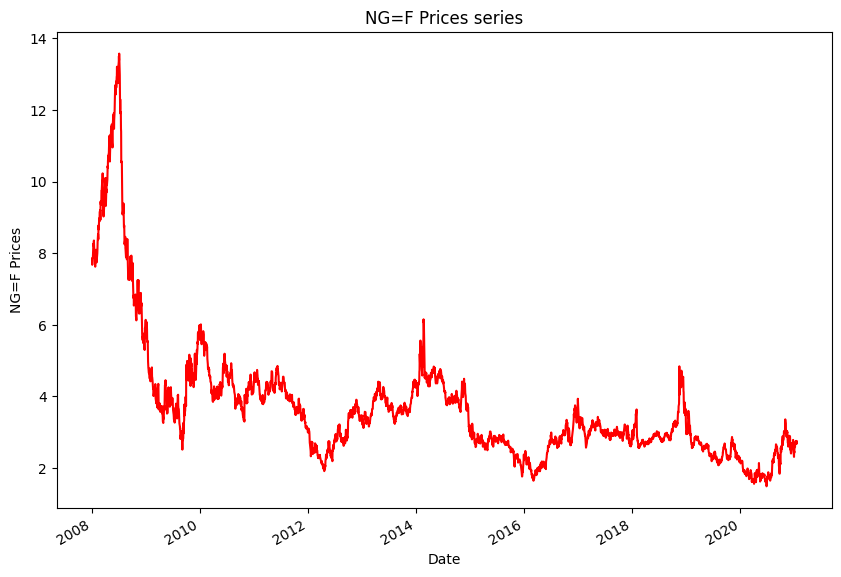

In [25]:
data.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("{} Prices".format(stock))
plt.title("{} Prices series".format(stock))
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_1456\2422862908.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Close"])


<Axes: xlabel='Close', ylabel='Density'>

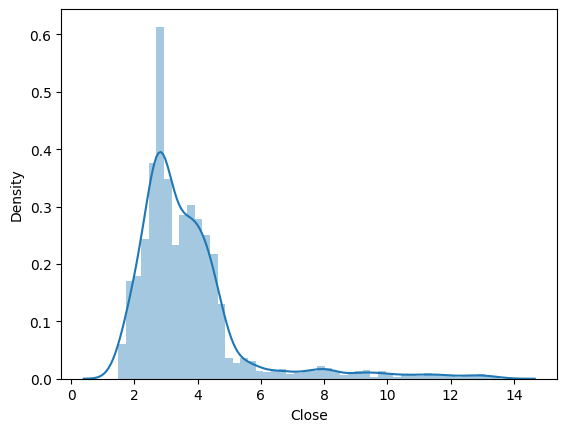

In [28]:
sns.distplot(data["Close"])


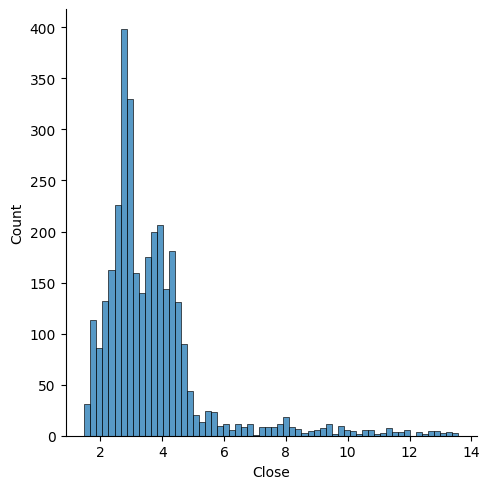

In [29]:
sns.displot(data["Close"])

<Axes: xlabel='Close', ylabel='Count'>

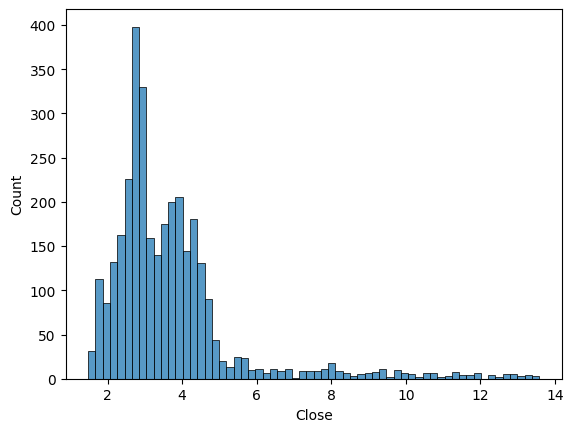

In [30]:
sns.histplot(data["Close"])

C:\Users\hp\AppData\Local\Temp\ipykernel_1456\3591762098.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Open"])


<Axes: xlabel='Open', ylabel='Density'>

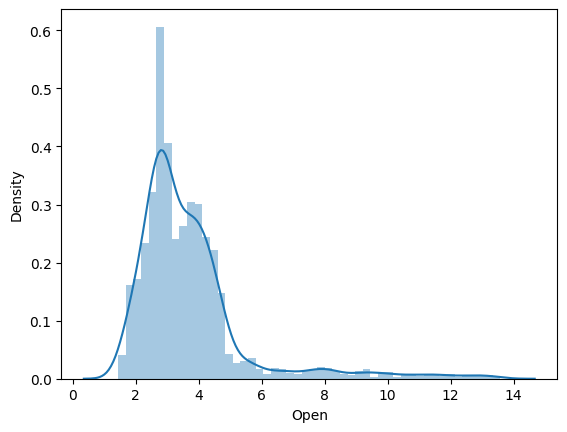

In [31]:
sns.distplot(data["Open"])


In [42]:
#split data into y ans x axis

x = data.drop("Close", axis=1)
y = data["Close"]

from sklearn.model_selection import train_test_split

x_train, x_test , y_train , y_test = train_test_split(x,y,test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2625, 4)
(657, 4)
(2625,)
(657,)


In [41]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
pred1 = lr.predict(x_test)   

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, y_pred):
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2_scors = r2_score(y_test,y_pred)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 score:", r2_scors)

calculate_metrics(y_test,pred1)


MSE: 0.0015345662928876315
RMSE: 0.03917354072441795
R2 score: 0.9994383299702705


In [47]:
from sklearn.linear_model import Lasso, Ridge

la = Lasso().fit(x_train, y_train)
ri = Ridge().fit(x_train, y_train)

la_p = la.predict(x_test)
ri_p = ri.predict(x_test)

In [49]:
calculate_metrics(y_test,la_p)

MSE: 0.2369233626053286
RMSE: 0.48674774021594447
R2 score: 0.9132831519010187


In [50]:
calculate_metrics(y_test,ri_p)

MSE: 0.0016151026199614476
RMSE: 0.040188339353118926
R2 score: 0.9994088526896658


In [53]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

param_grid = { 'C': [0.1,1,10,100,1000],
              'gamma' : [1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(SVR(), param_grid, refit= True, verbose=3)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.075 total time=   0.6s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.070 total time=   0.6s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.072 total time=   0.6s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.073 total time=   0.6s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.050 total time=   0.6s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.074 total time=   0.6s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.070 total time=   0.6s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.072 total time=   0.6s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.072 total time=   0.6s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.050 total time=   0.6s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.073 total time=   0.6s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [55]:
svr = SVR(C=10, gamma=0.01, kernel='rbf')
svr.fit(x_train,y_train)
svr_pred = svr.predict(x_test)

In [58]:
import joblib
joblib.dump(ri,'model.pkl')
ridge_from_joblib = model = joblib.load('model.pkl')

In [62]:
 model.predict(np.array([[1,2,3,8]]))

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([3.39650248])